In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [4]:
df = pd.read_csv('cleanDataFINAL_translate.csv')
df

,Clean Tweet
0,coalition of civil society concerned about dis...
1,cc dasco country dares to call it a national d...
2,banda aceh aceh governor muzakir manaf mualem ...
3,"acehnese people, severe flash floods, tsunami ..."
4,emergency bridge built by residents reje linge...
...,...
1067,bdx indonesia indosat strong emergency respons...
1068,minister of social affairs for social assistan...
1069,kemenpu adhi river hand affected by floods in ...
1070,tni orders to optimally clean west sumatra isl...


In [5]:
#textblob
polarity = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['Clean Tweet'].apply(polarity)
def analysis(score):
    if score > 0 :
        return 'positive'
    else:
        return 'negative'
df['Score'] = df['polarity'].apply(analysis)
df.head()
print("Positif :", (sum(df['Score'] =='positive')))
print("Negatif :", (sum(df['Score'] =='negative')))
df

Positif : 387
Negatif : 685


,Clean Tweet,polarity,Score
0,coalition of civil society concerned about dis...,-0.122222,negative
1,cc dasco country dares to call it a national d...,0.000000,negative
2,banda aceh aceh governor muzakir manaf mualem ...,-0.050000,negative
3,"acehnese people, severe flash floods, tsunami ...",0.036905,positive
4,emergency bridge built by residents reje linge...,0.000000,negative
...,...,...,...
1067,bdx indonesia indosat strong emergency respons...,0.391667,positive
1068,minister of social affairs for social assistan...,0.033333,positive
1069,kemenpu adhi river hand affected by floods in ...,0.000000,negative
1070,tni orders to optimally clean west sumatra isl...,0.366667,positive


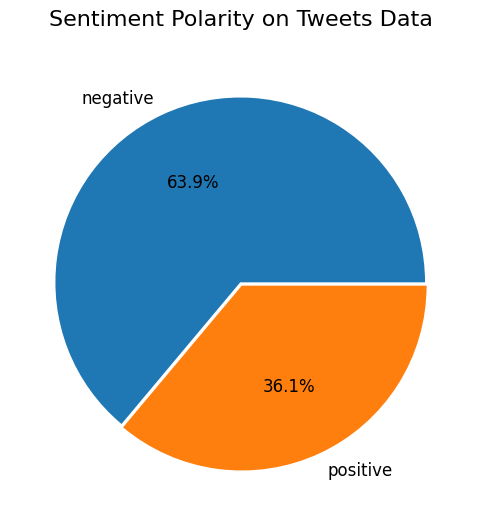

In [5]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['Score'].value_counts('positive', 'negative')]
labels = list(df['Score'].value_counts('positive', 'negative').index)
explode = (0.01, 0.01)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 12})
ax.set_title('Sentiment Polarity on Tweets Data', fontsize = 16, pad = 20)
plt.show()

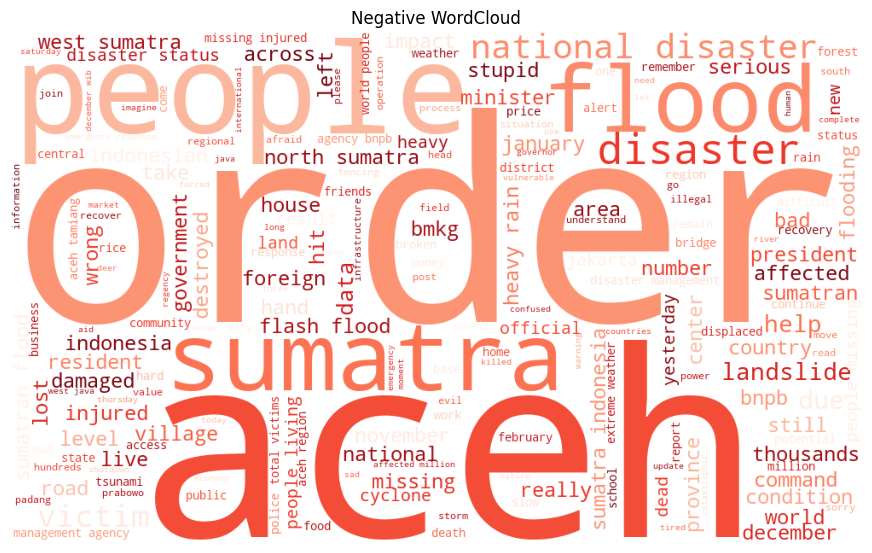

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

negative_words =' '.join([str(text) for text in df['Clean Tweet'][df['polarity'] < 0]])
def wordcloud(data, title = None):
    wordcloud = WordCloud(width = 500, height =300,
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=200,
        scale=2,
        random_state=3,
        colormap='Reds' # Changed colormap to 'Reds' for a negative wordcloud
).generate(str(data))
    fig = plt.figure(1, figsize=(11,11))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.title('Negative WordCloud')
    plt.show()
wordcloud(negative_words)

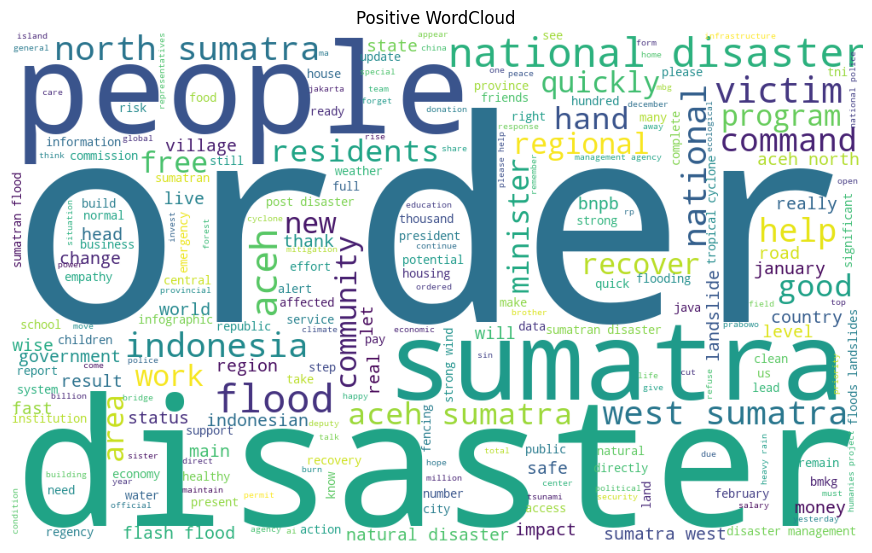

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

positive_words =' '.join([str(text) for text in df['Clean Tweet'][df['polarity'] > 0]])
def wordcloud(data, title = None):
    wordcloud = WordCloud(width = 500, height =300,
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=200,
        scale=2,
        random_state=3
).generate(str(data))
    fig = plt.figure(1, figsize=(11, 11))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.title('Positive WordCloud')
    plt.show()
wordcloud(positive_words)

In [ ]:
#simpan data textblob
#df.to_csv('cleanDataFINAL_texblob.csv', encoding='utf-8', index=False)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Clean Tweet'], df['Score'],
                                                    test_size = 0.1,
                                                    random_state=42,
                                                    shuffle=True)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(964,)
(964,)
(108,)
(108,)


In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(tfidf_train, y_train)

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [ ]:
y_pred = nb.predict(tfidf_test)
global cf_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(f'confusion_matrix:\n {cf_matrix}')

confusion_matrix:
 [[49 16]
 [12 31]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.75      0.78        65
    positive       0.66      0.72      0.69        43

    accuracy                           0.74       108
   macro avg       0.73      0.74      0.73       108
weighted avg       0.75      0.74      0.74       108



<Axes: >

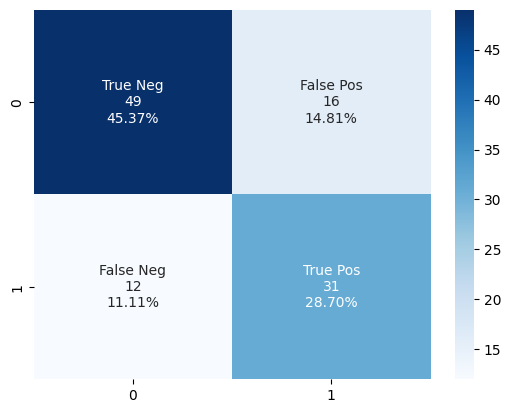

In [21]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [22]:
import pickle
# Save the model as a pickle file
pickle.dump(nb, open('NB_model.sav', 'wb'))